In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the exports. Using the past 70 yeats total amount of export in HK.

In [2]:
# Import the libraries
!pip install --upgrade pandas-datareader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('Trade_Figures.xlsx')
# Get the export amont 
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Show the data
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,Imports,TotalExports,Imports.1,Total Exports,Total Trade,Merchandise trade balance
0,1952,3779,2899,N.A.,N.A.,6678,-880
1,1953,3873,2734,2.5,-5.7,6606,-1139
2,1954,3435,2417,-11.3,-11.6,5852,-1018
3,1955,3719,2534,8.3,4.8,6253,-1185
4,1956,4566,3210,22.8,26.7,7776,-1357
...,...,...,...,...,...,...,...
65,2017,4357004,3875898,8.7,8,8232902,-481106
66,2018,4721399,4158106,8.4,7.3,8879505,-563292
67,2019,4415440,3988685,-6.5,-4.1,8404126,-426755
68,2020,4269752,3927517,-3.3,-1.5,8197270,-342235


In [4]:
# Get the number of rows and columns in the data set

df.shape

(70, 7)

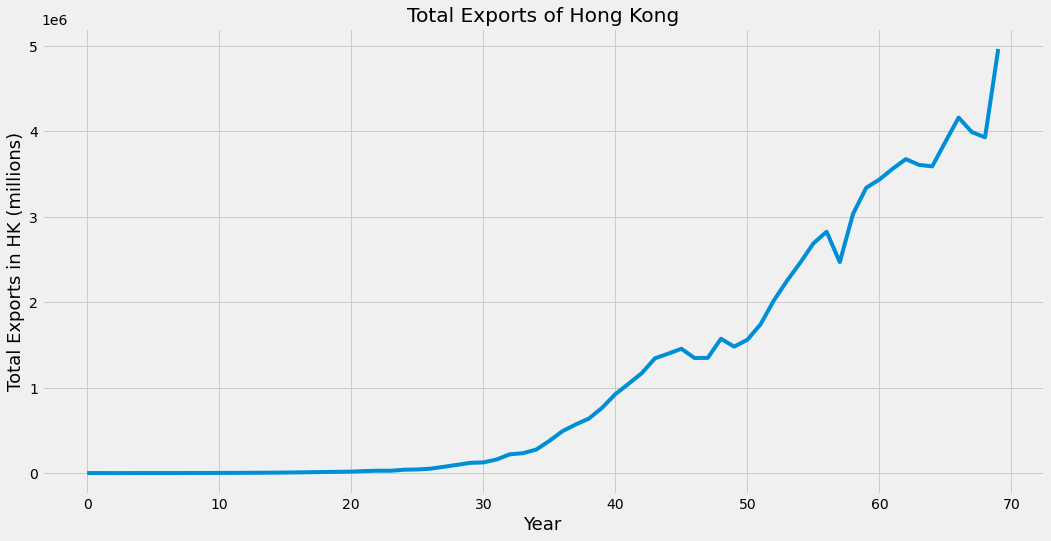

In [5]:
# Visualize the total exports history
plt.figure(figsize=(16,8))
plt.title('Total Exports of Hong Kong')
plt.plot(df['TotalExports'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Exports in HK (millions)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close Column'
data = df.filter(['TotalExports'])
# Convert the dataframe to a numpy array
dataset = data.values
# get the 80% of rows to train the model 
# math.ceil = round up
training_data_len = math.ceil( len(dataset)*.8)

training_data_len

56

In [7]:
# Scale the data
# A good pratice before making the model is Scaling

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[9.72119335e-05],
       [6.39339895e-05],
       [0.00000000e+00],
       [2.35970876e-05],
       [1.59935816e-04],
       [1.20809021e-04],
       [1.15363539e-04],
       [1.73650363e-04],
       [3.06762139e-04],
       [3.05148663e-04],
       [3.97318483e-04],
       [5.19135927e-04],
       [6.79071743e-04],
       [8.29528387e-04],
       [1.03786849e-03],
       [1.28352022e-03],
       [1.64433380e-03],
       [2.17415901e-03],
       [2.58579709e-03],
       [2.97424146e-03],
       [3.42520802e-03],
       [4.75612410e-03],
       [5.57032446e-03],
       [5.52918082e-03],
       [7.89393170e-03],
       [8.55465015e-03],
       [1.03849371e-02],
       [1.48272401e-02],
       [1.93264181e-02],
       [2.41509133e-02],
       [2.52041098e-02],
       [3.19230275e-02],
       [4.41737480e-02],
       [4.69390443e-02],
       [5.52843459e-02],
       [7.57561304e-02],
       [9.89569079e-02],
       [1.14575356e-01],
       [1.28565202e-01],
       [1.53979871e-01],


In [8]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(23, len(train_data)):
    x_train.append(train_data[i-23:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 23:
      print(x_train)
      print(y_train)
      print()

[array([9.72119335e-05, 6.39339895e-05, 0.00000000e+00, 2.35970876e-05,
       1.59935816e-04, 1.20809021e-04, 1.15363539e-04, 1.73650363e-04,
       3.06762139e-04, 3.05148663e-04, 3.97318483e-04, 5.19135927e-04,
       6.79071743e-04, 8.29528387e-04, 1.03786849e-03, 1.28352022e-03,
       1.64433380e-03, 2.17415901e-03, 2.58579709e-03, 2.97424146e-03,
       3.42520802e-03, 4.75612410e-03, 5.57032446e-03])]
[0.005529180824078872]



In [9]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(33, 23, 1)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(53, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(53, return_sequences= False))
model.add(Dense(23))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

33/33 [==============================] - 4s 23ms/step - loss: 0.0129


In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 49 to 72
test_data = scaled_data[training_data_len - 23: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(23, len(test_data)):
  x_test.append(test_data[i-23:i, 0])


In [19]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],23, 1))

In [22]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 875ms/step


In [23]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

869468.25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


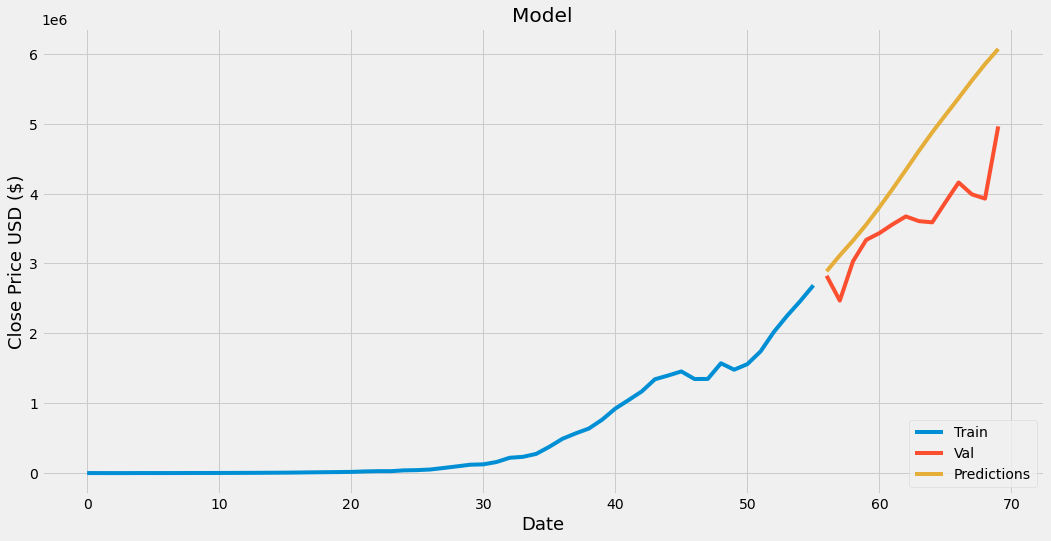

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['TotalExports'])
plt.plot(valid[['TotalExports', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [25]:
# Show the valid and predicted Exports
valid

,TotalExports,Predictions
56,2824151,2887990.25
57,2469089,3115367.00
58,3031019,3327365.00
59,3337253,3555276.50
60,3434346,3804400.00
61,3559686,4066684.75
62,3672751,4337689.50
63,3605279,4612084.00
64,3588247,4875363.50
65,3875898,5122046.50
